In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
from scipy.stats import norm

# Open DataFrame

In [2]:
df = pd.read_csv('datafiles/june4/data1.csv', sep=',')
df['ratio']=df['Integral 1200']/df['Integral 7400']
df.head()

,Time,Integral 1200,Integral 7400,ratio
0,1.528150e+09,67986,111746.0,0.608398
1,1.528150e+09,37655,53317.0,0.706248
2,1.528150e+09,70037,117233.0,0.597417
3,1.528150e+09,53668,88457.0,0.606713
4,1.528150e+09,267520,448843.0,0.596021


In [ ]:
mask = df[]

In [5]:
(mu, sigma) = norm.fit(np.array(df['ratio']))

In [6]:
mu

0.6044032414292749

# Preliminary Plot

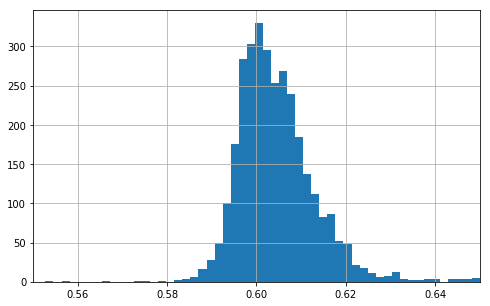

In [7]:
fig, ax = plt.subplots(figsize=(8,5))

df['ratio'].hist(bins=300, ax=ax)

ax.set_xlim(0.55,0.65)
plt.show()